In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import csv 
from fitter import Fitter, get_common_distributions, get_distributions
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
ruta_csv = 'student-por.csv'
df = pd.read_csv(ruta_csv, delimiter = ';')
dfc = df.drop(['address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime','studytime', 'failures','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health', 'G1', 'G2' ],axis=1)
print(dfc.head())

  school sex  age Pstatus guardian romantic  goout  absences  G3
0     GP   F   18       A   mother       no      4         4  11
1     GP   F   17       T   father       no      3         2  11
2     GP   F   15       T   mother       no      2         6  12
3     GP   F   15       T   mother      yes      2         0  14
4     GP   F   16       T   father       no      2         0  13


# DEPURACIÓN
Se eliminan las variables que no pensamos considerar en el analisis inicial.

## Variables utilizadas

>**Nombre Variable** : school , **Tipo** : Categórica nominativa  , **Descripción** : Escuela del estudiante (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).

>**Nombre Variable** : sex , **Tipo** : Categórica nominativa , **Descripción** : Género del estudiante (binario: 'F' - femenino o 'M' - masculino).

>**Nombre Variable** : age , **Tipo** :Cuantitativa Discreta , **Descripción** : Edad del estudiante (numérica: de 15 a 22).

>**Nombre Variable** : Pstatus , **Tipo** : Categórica nominativa , **Descripción** : Estado de convivencia de los padres (binario: 'T' - viviendo juntos o 'A' - separados).

>**Nombre Variable** : guardian , **Tipo** : Categórica nominativa , **Descripción** : Tutor del estudiante (nominal: 'madre', 'padre' u 'otro').

>**Nombre Variable** : romantic , **Tipo** : Categórica nominativa , **Descripción** : Con una relación romántica (binario: sí o no).

>**Nombre Variable** : goout , **Tipo** : Categórica nominativa , **Descripción** : Salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto).

>**Nombre Variable** : G3	 , **Tipo** : Cuantitativa Discreta , **Descripción** : Nota final (numérica: de 0 a 20).

In [3]:
dfc.describe()

,age,goout,absences,G3
count,649.000000,649.000000,649.000000,649.000000
mean,16.744222,3.184900,3.659476,11.906009
std,1.218138,1.175766,4.640759,3.230656
min,15.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,0.000000,10.000000
50%,17.000000,3.000000,2.000000,12.000000
75%,18.000000,4.000000,6.000000,14.000000
max,22.000000,5.000000,32.000000,19.000000


# Medidas posición y dispersión G3 (Muestra)
> La media de la muestra es 11.906 aproximadamente y con una desviación típica presente ,en este caso, alrededor de 3.230, lo que indica que las notas finales tienden a variar en 3.230 unidades con respecto a la media.
> El valor mínimo observado es 0, lo que sugiere que algunos estudiantes han obtenido la calificación mínima posible.
> El 25% de los estudiantes tienen una nota final igual o inferior a 10
> En este caso, el 50% de los estudiantes tienen una nota final igual o inferior a 12 (Mediana)
> El 75% de los estudiantes tienen una nota final igual o inferior a 14
> El valor máximo observado es 19, indicando que ningún estudiantes ha obtenido la calificación máxima posible

# CREACIÓN SUBMUESTRAS
>Separamos los datos de nuestra muestra por Hombres/Mujeres y por centros de estudios para comprobar si las medidas de posición y dispersión muestrales se comportan igual en los diferentes subgrupos.

In [4]:
dfcF = dfc[dfc['sex'] == 'F']
dfcM = dfc[dfc['sex'] == 'M']
dfcGP = dfc[dfc['school']=='GP']
dfcMS = dfc[dfc['school']=='MS']

In [5]:
dfcF.describe()

,age,goout,absences,G3
count,383.000000,383.000000,383.000000,383.000000
mean,16.788512,3.127937,3.577023,12.253264
std,1.175524,1.158546,4.667891,3.124147
min,15.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,0.000000,10.000000
50%,17.000000,3.000000,2.000000,12.000000
75%,18.000000,4.000000,5.000000,14.000000
max,21.000000,5.000000,32.000000,19.000000


>Las mujeres tienen una nota media ligeramente superior a la media muestral 0.347 y menor desviación respecto a la media


In [6]:
dfcM.describe()

,age,goout,absences,G3
count,266.000000,266.000000,266.000000,266.000000
mean,16.680451,3.266917,3.778195,11.406015
std,1.276550,1.197559,4.607587,3.320690
min,15.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,0.000000,10.000000
50%,17.000000,3.000000,2.000000,11.000000
75%,18.000000,4.000000,6.000000,13.000000
max,22.000000,5.000000,26.000000,19.000000


> Los hombres tienen una media ligeramente inferior a la media muestral-0.500 y una mayor desviación respecto a la media


In [7]:
dfcGP.describe()

,age,goout,absences,G3
count,423.000000,423.000000,423.000000,423.000000
mean,16.666667,3.146572,4.215130,12.576832
std,1.244895,1.152899,5.191915,2.625636
min,15.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,0.000000,11.000000
50%,17.000000,3.000000,2.000000,13.000000
75%,18.000000,4.000000,6.000000,14.000000
max,22.000000,5.000000,32.000000,19.000000


>Los estudiantes del colegio Gabriel Pereira tienen una media mayor a la media muestral 0.670 y una menor desviación



In [8]:
dfcMS.describe()

,age,goout,absences,G3
count,226.000000,226.000000,226.000000,226.000000
mean,16.889381,3.256637,2.619469,10.650442
std,1.155152,1.216763,3.130690,3.833991
min,15.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,0.000000,9.000000
50%,17.000000,3.000000,2.000000,11.000000
75%,18.000000,4.000000,4.000000,13.000000
max,20.000000,5.000000,12.000000,19.000000


>Los estudiantes del colegio Mousinho da Silveira tienen una media menor a la media muestral en -1.256 puntos y una desviación mayor.


## Bivariante

In [9]:
x = dfc['absences']
y = dfc['G3']
covariance = np.cov(x, y)[0, 1]

print(f'Covarianza entre absences y G3: {covariance}')

correlation_matrix = np.corrcoef(x, y)

correlation = correlation_matrix[0, 1]

print(f'Correlación entre absences y G3: {correlation}')

Covarianza entre absences y G3: -1.370018451939356
Correlación entre absences y G3: -0.0913790564387562


Hemos estudiado la covarianza y la correlación entre las variables 'goout' (representando el tiempo social) y 'G3' (las notas finales).

# Covarianza:
>Primero, calculamos la covarianza entre estas dos variables, obteniendo un valor de aproximadamente -0.333. Esta medida indica una relación inversa entre el tiempo dedicado a actividades sociales y las notas finales. Específicamente, cuando el tiempo social disminuye, las notas finales tienden a ser más altas, y viceversa. No obstante, la covarianza no proporciona detalles sobre la fuerza o magnitud exacta de esta relación.

# Correlación:
>Para obtener una perspectiva más detallada, calculamos la correlación normalizada entre 'goout' y 'G3'. El resultado fue de aproximadamente -0.0876. Este valor cercano a cero indica una correlación débil y sugiere que no existe una relación lineal fuerte entre el tiempo social y las notas finales. Además, al ser negativo, la correlación indica una tendencia leve hacia una relación inversa, aunque esta asociación es bastante débil.

>En resumen, los resultados indican que hay una relación inversa leve entre el tiempo social y las notas finales, pero la debilidad de la correlación sugiere que otros factores pueden estar influyendo significativamente en el rendimiento académico de los estudiantes.

In [10]:
frequency_table = pd.crosstab(index=df['romantic'], columns="count")
frequency_table['percentage'] = (frequency_table / frequency_table.sum()) * 100

print(frequency_table)

col_0     count  percentage
romantic                   
no          410   63.174114
yes         239   36.825886


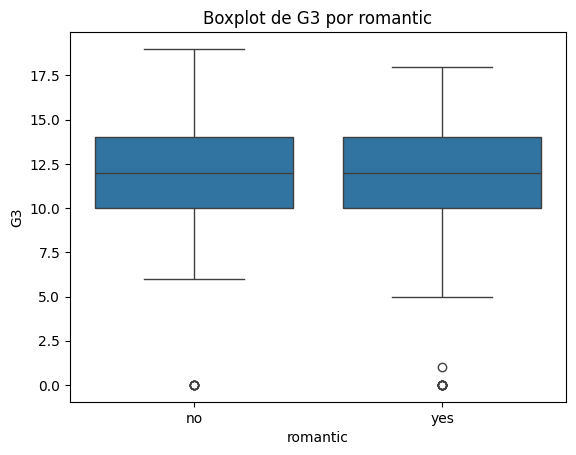

In [11]:
sns.boxplot(x='romantic', y='G3', data=df)
plt.title('Boxplot de G3 por romantic')
plt.show()

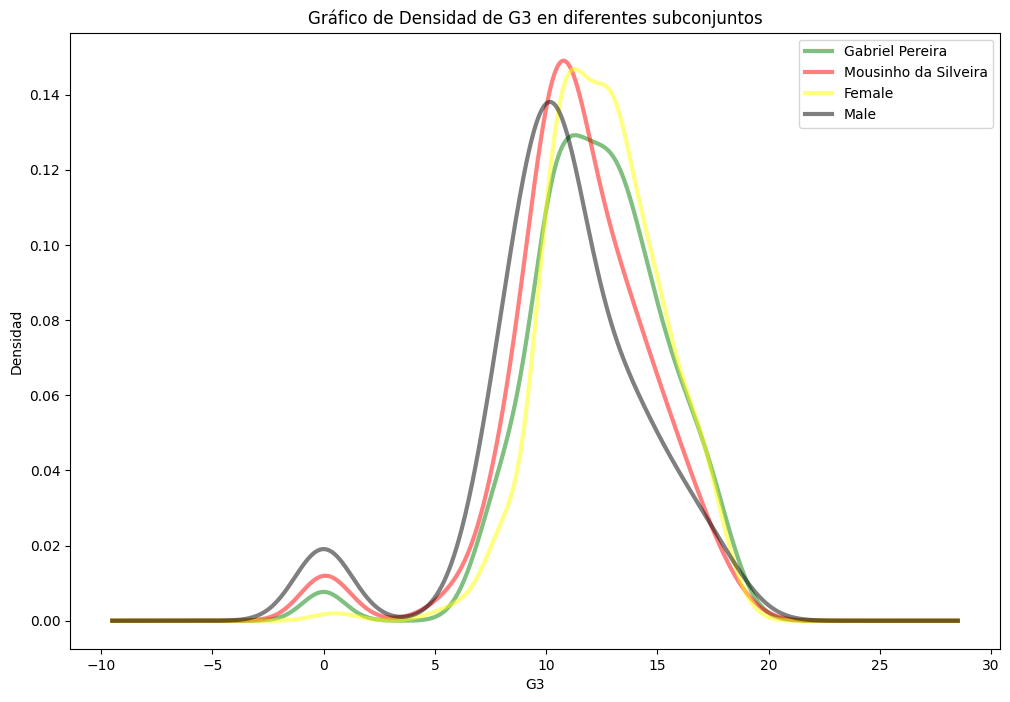

In [12]:

# Configuración del gráfico de densidad
plt.figure(figsize=(12, 8))

variable_x = 'G3'
for subset, label, color in zip([dfcF, dfcM,dfcGP, dfcMS], ['Gabriel Pereira', 'Mousinho da Silveira','Female','Male'], ['green', 'red','yellow','black']):
    subset[variable_x].plot(kind='density', alpha=0.5, label=label, color=color, linewidth=3)

# Configuración de leyendas y título
plt.title(f'Gráfico de Densidad de {variable_x} en diferentes subconjuntos')
plt.xlabel(variable_x)
plt.ylabel('Densidad')
plt.legend()
plt.show()


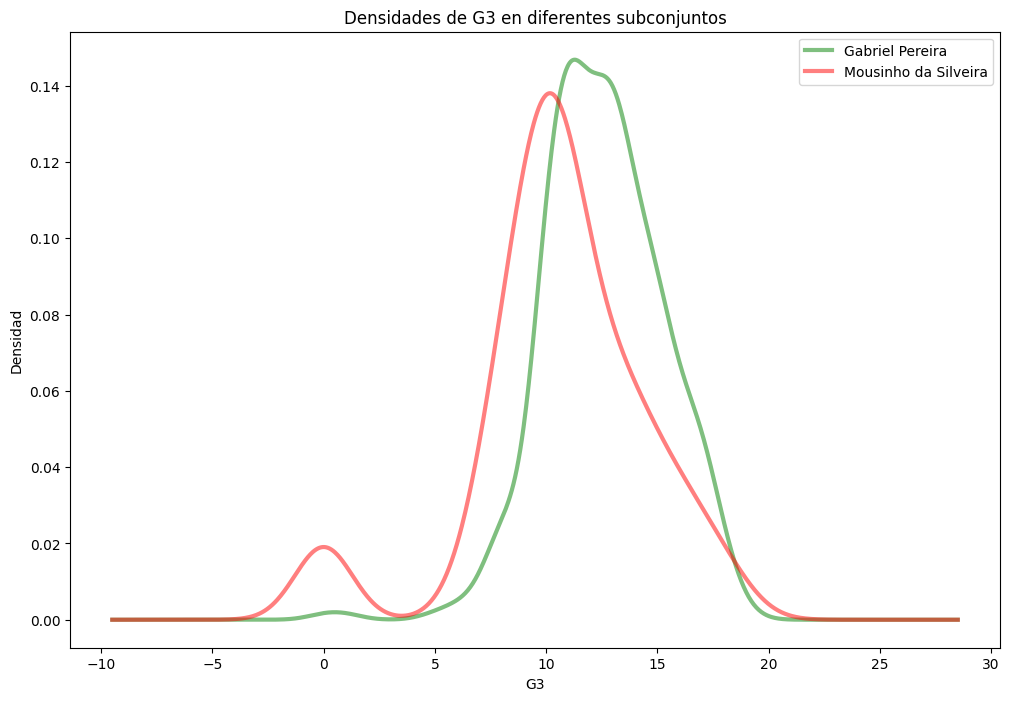

In [13]:
# Configuración del gráfico de densidades
plt.figure(figsize=(12, 8))

variable_x =  'G3'

for subset, label, color in zip([dfcGP, dfcMS], ['Gabriel Pereira', 'Mousinho da Silveira'], ['green', 'red']):
    subset[variable_x].plot(kind='density', alpha=0.5, label=label, color=color, linewidth=3)

# Configuración de leyendas y título
plt.title(f'Densidades de {variable_x} en diferentes subconjuntos')
plt.xlabel(variable_x)
plt.ylabel('Densidad')
plt.legend()
plt.show()


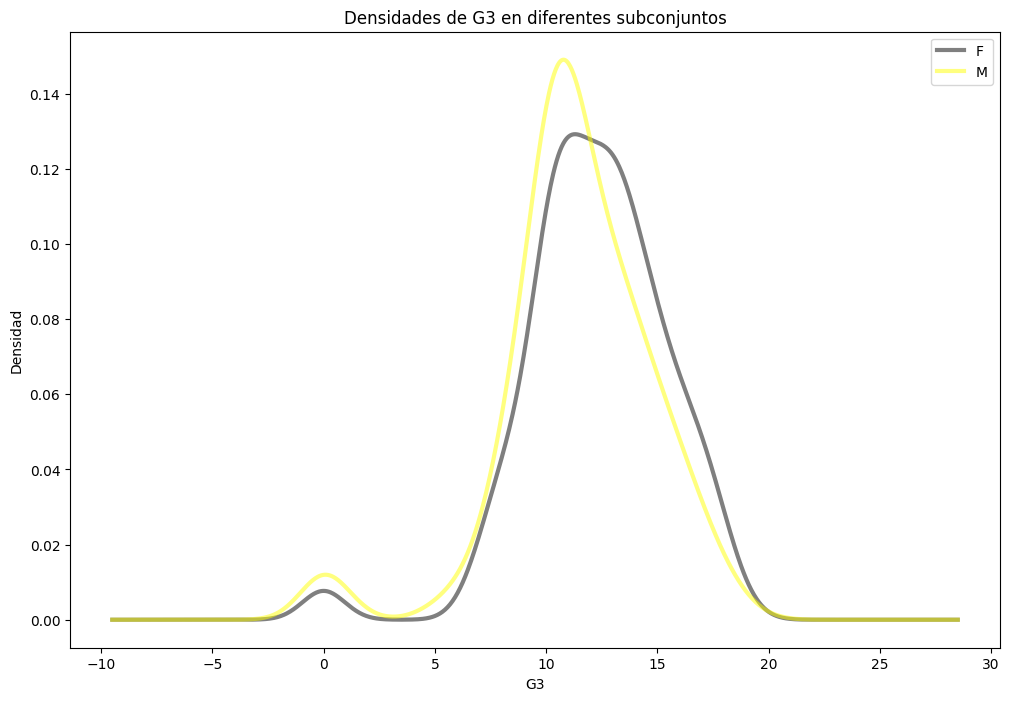

In [14]:
# Configuración del gráfico de densidades
plt.figure(figsize=(12, 8))

variable_x =  'G3'

for subset, label, color in zip([dfcF, dfcM], ['F', 'M'], ['black', 'yellow']):
    subset[variable_x].plot(kind='density', alpha=0.5, label=label, color=color, linewidth=3)

# Configuración de leyendas y título
plt.title(f'Densidades de {variable_x} en diferentes subconjuntos')
plt.xlabel(variable_x)
plt.ylabel('Densidad')
plt.legend()
plt.show()


C:\Users\Paco\AppData\Local\Temp\ipykernel_13748\208112996.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable_x, y=variable_y, data=dfc, palette=custom_palette)


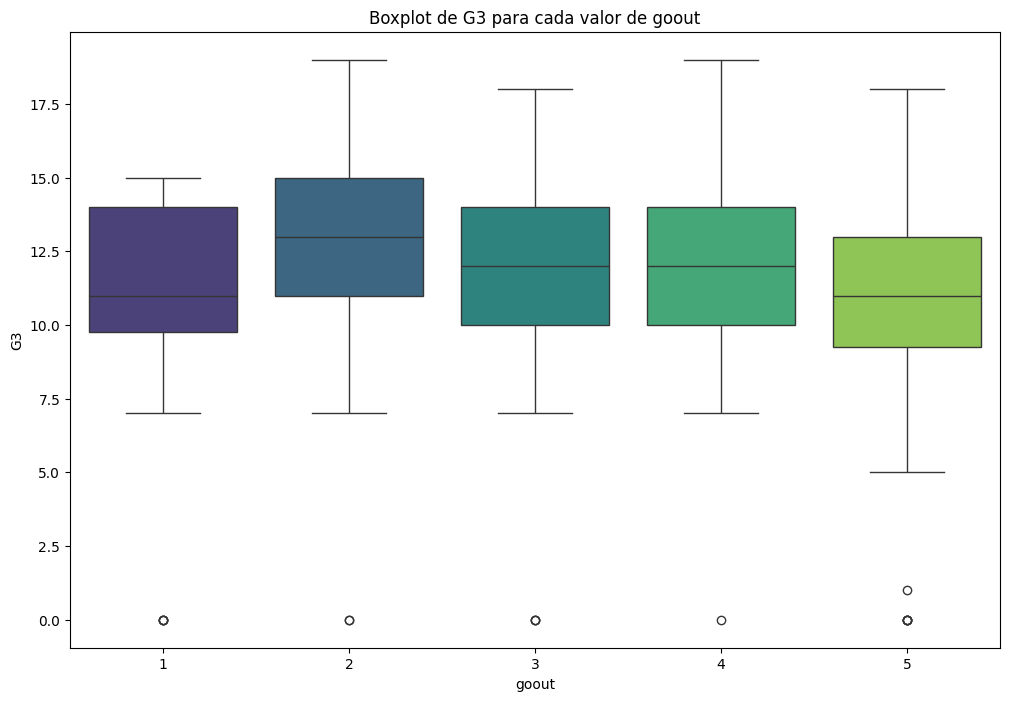

In [17]:
import seaborn as sns

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("viridis", len(dfc['goout'].unique()))
variable_x = 'goout'
variable_y = 'G3'
# Crear el boxplot con la paleta personalizada
plt.figure(figsize=(12, 8))
sns.boxplot(x=variable_x, y=variable_y, data=dfc, palette=custom_palette)
plt.title(f'Boxplot de {variable_y} para cada valor de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()


In [21]:
# Calcular la media para cada valor de 'goout'
mean_by_goout = dfc.groupby('goout')['G3'].mean()
ci_by_goout = dfc.groupby('goout')['G3'].apply(lambda x: sm.stats.DescrStatsW(x).tconfint_mean())
summary_df = pd.DataFrame({'Media de G3': mean_by_goout, 'Intervalo de Confianza': ci_by_goout})
print(summary_df)


       Media de G3                    Intervalo de Confianza
goout                                                       
1        10.729167    (9.612189034579592, 11.84614429875374)
2        12.668966  (12.148431767112772, 13.189499267369985)
3        12.151220  (11.751558997207656, 12.550880027182586)
4        11.971631  (11.502412703053533, 12.440849708293985)
5        10.872727  (10.169786036391951, 11.575668509062595)


In [18]:
# Calcular el conteo de registros para cada valor único de 'goout'
conteo_goout = dfc['goout'].value_counts()

# Mostrar el conteo de registros para cada valor único de 'goout'
print(conteo_goout)


goout
3    205
2    145
4    141
5    110
1     48
Name: count, dtype: int64


In [19]:
from scipy.stats import ttest_ind

# Obtener las notas cuando goout es 2 y cuando goout es 5
notas_goout_2 = dfc[dfc['goout'] == 2]['G3']
notas_goout_5 = dfc[dfc['goout'] == 5]['G3']

# Realizar el test de hipótesis
t_statistic, p_value = ttest_ind(notas_goout_2, notas_goout_5)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)


Estadístico t: 4.155833178091734
Valor p: 4.438110257977916e-05


El valor p es muy pequeño, aproximadamente 0.00004438; Por lo tanto, hay evidencia significativa para rechazar la hipótesis nula y concluir que **hay una diferencia significativa en las notas entre los grupos donde goout es 2 y donde goout es 5.**

In [20]:
from scipy.stats import ttest_ind

# Obtener las notas cuando goout es 2 y cuando goout es 5
notas_goout_2 = dfc[dfc['goout'] == 1]['G3']
notas_goout_5 = dfc[dfc['goout'] == 5]['G3']

# Realizar el test de hipótesis
t_statistic, p_value = ttest_ind(notas_goout_2, notas_goout_5)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)


Estadístico t: -0.2208055704481046
Valor p: 0.8255325541986781


El valor p es 0.8255; Por lo tanto, no hay suficiente evidencia para rechazar la hipótesis nula, lo que significa que **no hay una diferencia significativa en las notas entre los grupos donde goout es 1 y donde goout es 5.**

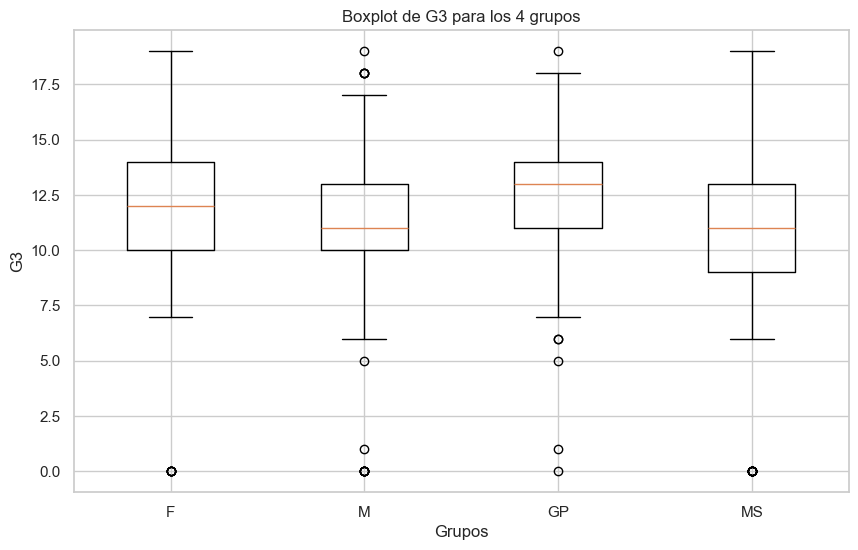

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



dataframes = [dfcF, dfcM, dfcGP, dfcMS]
labels = ['F', 'M', 'GP', 'MS']


variable_y = 'G3'

# Crear el boxplot para cada DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot([df[variable_y] for df in dataframes], labels=labels)
plt.title(f'Boxplot de {variable_y} para los 4 grupos')
plt.xlabel('Grupos')
plt.ylabel(variable_y)
plt.show()


# INFERENCIA

## Estudio normalidad G3

In [ ]:
scipy.stats.normaltest(dfc['G3'])

NormaltestResult(statistic=114.20475535916196, pvalue=1.5876416009730048e-25)

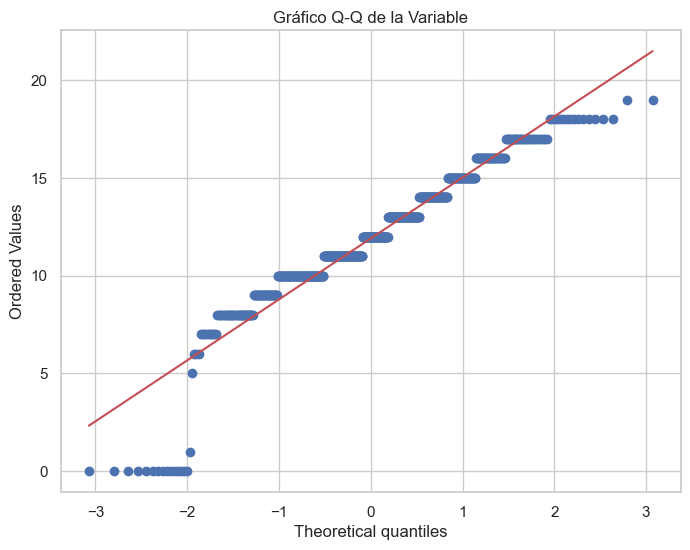

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu variable de interés
data = dfc['G3']

# Configuración del gráfico Q-Q
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de la Variable')
plt.show()

In [ ]:
from scipy.stats import shapiro

data = dfc['G3']

# Realizar la prueba de Shapiro-Wilk
stat, p_value = shapiro(data)

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_value}')

Estadístico de prueba: 0.9259809367060796
Valor p: 2.4159862607742608e-17


In [ ]:
from scipy.stats import anderson


data = dfc['G3']

# Realizar la prueba de Anderson-Darling
result = anderson(data)

print(f'Estadístico de prueba: {result.statistic}')
print(f'Valores críticos: {result.critical_values}')
print(f'Niveles de significancia: {result.significance_level}')

Estadístico de prueba: 8.233576677118435
Valores críticos: [0.573 0.652 0.782 0.912 1.085]
Niveles de significancia: [15.  10.   5.   2.5  1. ]


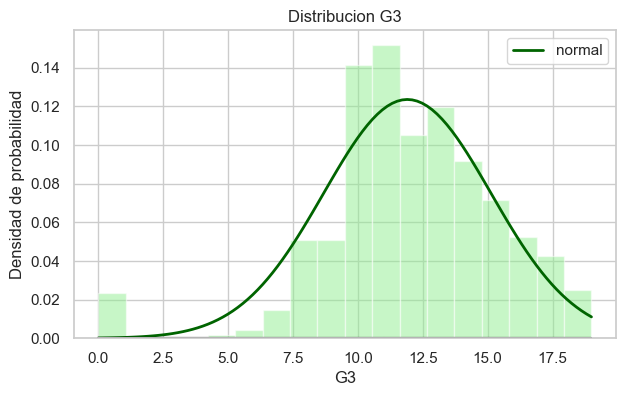

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = stats.norm.fit(df['G3'])  # Change 'goout' to 'G3'

x_hat = np.linspace(min(df['G3']), max(df['G3']), num=100)  # Change 'goout' to 'G3'
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_hat, y_hat, linewidth=2, color="darkgreen", label='normal')
ax.hist(df['G3'], density=True, bins=18, color="lightgreen", alpha=0.5)  # Change 'goout' to 'G3'
ax.plot(df['G3'], np.full_like(df['G3'], -0.01), 'k', markeredgewidth=1)  # Change 'goout' to 'G3'
ax.set_title('Distribucion G3')  # Change 'goout' to 'G3'
ax.set_xlabel('G3')  # Change 'goout' to 'G3'
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

plt.show()



## Estudio normalidad goout

In [ ]:
scipy.stats.normaltest(dfc['goout'])

NormaltestResult(statistic=70.5973250516152, pvalue=4.677196827985334e-16)

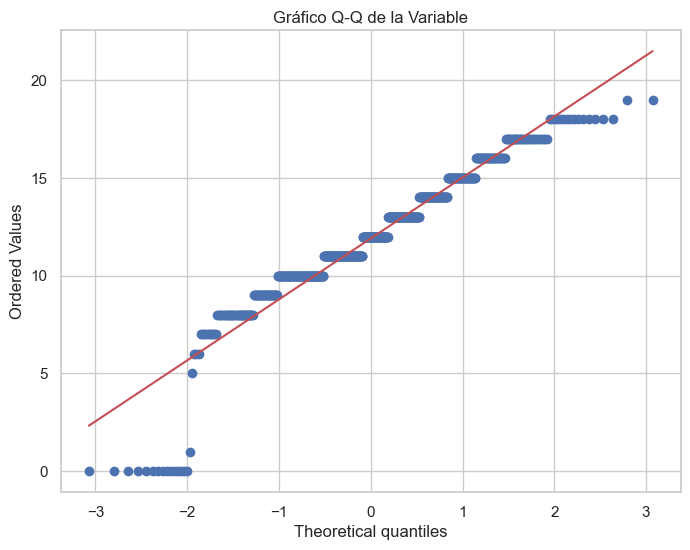

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu variable de interés
data = dfc['G3']

# Configuración del gráfico Q-Q
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de la Variable')
plt.show()

In [ ]:
from scipy.stats import shapiro

data = dfc['G3']

# Realizar la prueba de Shapiro-Wilk
stat, p_value = shapiro(data)

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_value}')

Estadístico de prueba: 0.9259809367060796
Valor p: 2.4159862607742608e-17


In [ ]:
from scipy.stats import anderson


data = dfc['G3']

# Realizar la prueba de Anderson-Darling
result = anderson(data)

print(f'Estadístico de prueba: {result.statistic}')
print(f'Valores críticos: {result.critical_values}')
print(f'Niveles de significancia: {result.significance_level}')

Estadístico de prueba: 8.233576677118435
Valores críticos: [0.573 0.652 0.782 0.912 1.085]
Niveles de significancia: [15.  10.   5.   2.5  1. ]


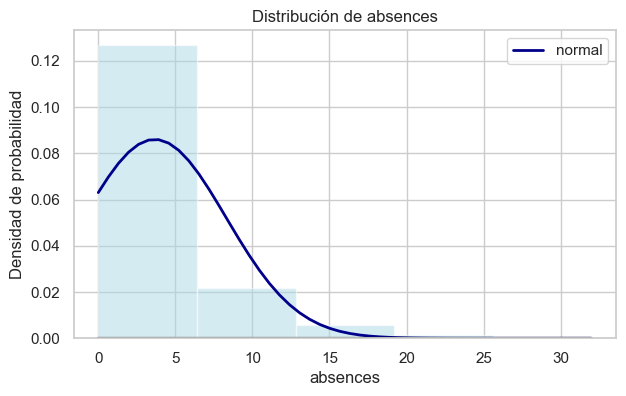

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Ajustar la distribución normal a los datos de 'absences'
mu, sigma = stats.norm.fit(df['absences'])

# Crear un conjunto de valores para representar la distribución ajustada
x_hat = np.linspace(min(df['absences']), max(df['absences']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_hat, y_hat, linewidth=2, color="darkblue", label='normal')
ax.hist(df['absences'], density=True, bins=5, color="lightblue", alpha=0.5)
ax.plot(df['absences'], np.full_like(df['absences'], -0.01), 'k', markeredgewidth=1)
ax.set_title('Distribución de absences')
ax.set_xlabel('absences')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

plt.show()



# Anova para romantic y G3

In [ ]:
model = ols('G3 ~ romantic', data=dfc).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

               sum_sq     df         F    PR(>F)
romantic    55.494352    1.0  5.352723  0.021002
Residual  6707.772211  647.0       NaN       NaN


## Interpretación de la tabla ANOVA:

>Sum_sq (Suma de cuadrados):
La suma de cuadrados asociada con la variable romantic es 55.494352.
La suma de cuadrados residual (error) es 6707.772211.
df (grados de libertad):
Hay 1 grado de libertad asociado con la variable romantic.
Hay 647 grados de libertad residuales (error).
F (Estadística F):
El valor de la estadística F es 5.352723.
PR(>F) (Valor p):
El valor p es 0.021002.
Interpretación del valor p (PR(>F)):

>El valor p (0.021002) es menor que el nivel de significancia común de 0.05.
Esto sugiere que hay evidencia estadística significativa para rechazar la hipótesis nula de que no hay efecto de la variable romantic en la variable dependiente G3.
Interpretación de la estadística F:

>La estadística F compara la variabilidad explicada por la variable romantic con la variabilidad no explicada (residual).
    Un valor F grande sugiere que la variable romantic está teniendo un efecto significativo en la variable G3.

## Conclusiones:

>La variable romantic parece tener un impacto significativo en la variable dependiente G3, según el análisis de ANOVA.
La relación entre estas dos variables es estadísticamente significativa.


>En resumen, según el análisis de ANOVA, hay evidencia estadística para sugerir que la variable romantic tiene un impacto significativo en la variable G3.

In [ ]:

model = ols('G3 ~ C(goout)', data=dfc).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


               sum_sq     df         F    PR(>F)
C(goout)   281.260151    4.0  6.985936  0.000017
Residual  6482.006413  644.0       NaN       NaN


In [ ]:

tukey_result = mc.MultiComparison(dfc['G3'], dfc['goout']).tukeyhsd()


print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   1.9398 0.0024  0.4946   3.385   True
     1      3   1.4221 0.0424  0.0305  2.8137   True
     1      4   1.2425 0.1326 -0.2078  2.6927  False
     1      5   0.1436  0.999 -1.3577  1.6448  False
     2      3  -0.5177 0.5603 -1.4595   0.424  False
     2      4  -0.6973 0.3411 -1.7238  0.3291  False
     2      5  -1.7962 0.0001 -2.8936 -0.6989   True
     3      4  -0.1796 0.9856 -1.1291  0.7699  False
     3      5  -1.2785 0.0062 -2.3042 -0.2528   True
     4      5  -1.0989 0.0518 -2.2029  0.0051  False
----------------------------------------------------


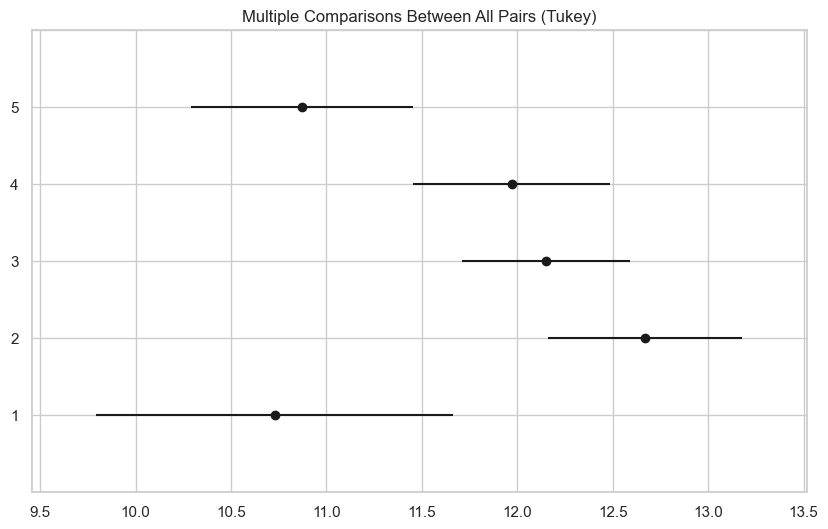

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.9398,0.0024,0.4946,3.385,True
1,3,1.4221,0.0424,0.0305,2.8137,True
1,4,1.2425,0.1326,-0.2078,2.6927,False
1,5,0.1436,0.999,-1.3577,1.6448,False
2,3,-0.5177,0.5603,-1.4595,0.424,False
2,4,-0.6973,0.3411,-1.7238,0.3291,False
2,5,-1.7962,0.0001,-2.8936,-0.6989,True
3,4,-0.1796,0.9856,-1.1291,0.7699,False
3,5,-1.2785,0.0062,-2.3042,-0.2528,True
4,5,-1.0989,0.0518,-2.2029,0.0051,False


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=dfc['G3'], groups=dfc['goout'], alpha=0.05)

# Gráfico de intervalos de confianza y líneas rojas
tukey.plot_simultaneous()
plt.vlines(x=tukey.meandiffs, ymin=-0.5, ymax=len(tukey.groupsunique)-1.5, color="red")

plt.show()

# Resumen de los resultados
tukey.summary()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajustar el modelo con múltiples variables explicativas
model = ols('G3 ~ C(goout) + C(sex) + C(school)', data=dfc).fit()

# Obtener la tabla ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Imprimir la tabla ANOVA
print(anova_table)


                sum_sq     df          F        PR(>F)
C(goout)    198.064213    4.0   5.424979  2.668856e-04
C(sex)      142.749892    1.0  15.639679  8.515674e-05
C(school)   523.095082    1.0  57.310302  1.299175e-13
Residual   5859.802369  642.0        NaN           NaN


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ajustar el modelo con múltiples variables explicativas
model = ols('G3 ~ C(goout) + C(sex) + C(school)', data=dfc).fit()

# Obtener la tabla ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Imprimir la tabla ANOVA
print(anova_table)

# Realizar el test de Tukey
tukey_results = pairwise_tukeyhsd(endog=dfc['G3'], groups=dfc['goout'], alpha=0.05)

# Imprimir los resultados del test de Tukey
print(tukey_results)


                sum_sq     df          F        PR(>F)
C(goout)    198.064213    4.0   5.424979  2.668856e-04
C(sex)      142.749892    1.0  15.639679  8.515674e-05
C(school)   523.095082    1.0  57.310302  1.299175e-13
Residual   5859.802369  642.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   1.9398 0.0024  0.4946   3.385   True
     1      3   1.4221 0.0424  0.0305  2.8137   True
     1      4   1.2425 0.1326 -0.2078  2.6927  False
     1      5   0.1436  0.999 -1.3577  1.6448  False
     2      3  -0.5177 0.5603 -1.4595   0.424  False
     2      4  -0.6973 0.3411 -1.7238  0.3291  False
     2      5  -1.7962 0.0001 -2.8936 -0.6989   True
     3      4  -0.1796 0.9856 -1.1291  0.7699  False
     3      5  -1.2785 0.0062 -2.3042 -0.2528   True
     4      5  -1.0989 0.0518 -2.2029  0.0051  False
------------------------------------